In [23]:
import time 
import numpy as np
import pandas as pd
import random
import math

#comment out whole line of code Ctrl + /


def sim_taxi(lambda1, lambda2, aban1, aban2, time_coef, T):
    np.random.seed(0)
    
#     lambda1 = 1
#     lambda2 = 1.2
#     aban1 = 1
#     aban2 = 1
#     time_coef = 1
#     T = 100 #termination




    NumC_aban = 0 # keep track of the total number of customer leave without being served.
    
    total_utilization = 0 # this varialbe calculate the total utilation of all taxi.
    total_taxi = 0 # the area under the taxis arrival graph (red graph).
    total_customer = 0
    
    
    
    total_throughput = 0

    
    #event calendar vector of 3
    EC = [0,0,0] # explain each entry: 1st entry is taxi arrival, 2nd customer arrival and 3rd entry is termination time.
    

    #event types
    # 1st entry: is the event type, 2nd entry: is the ID of a taxi, 3rd entry: is the ID of customer
    # list grow as simulation changes. 
    ET = [[0,0,0],
         [0,0,0],
         [0,0,0]]

    #ET[0][0]

    LT = [] #list of taxi
    LC = []  #list of customers

                    #check len(LC) = NumC at arbitrary point 

    NumT = 0 #hold: the total number of taxi in the system at any particular state.
    
    total_T = 0 #hold: the total number of taxi in the system through out the simulation + the ID of the current taxi
    
    Num_trip = 0 # RECORD THE TOTAL NUMBER OF TRIP COMPLETED
    
    total_T_accum = []
    

    NumC = 0 #number of customers
    total_C = 0 #Customer ID
    
    taxi_arrival_time = [] # a list that record the EC[0].  

    EC[0] = np.random.exponential(1/lambda1) #arrival rate of taxi
    EC[1] = np.random.exponential(1/lambda2) #arrival rate of customers
    EC[2] = T #termination 

    ET[0][0] = 1
    ET[1][0] = 2
    ET[2][0] = 3 

    TNOW = 0 
    
    list_utili = []
    utilization_acc = []
    
    utilization_each_taxi = []
    
    
    t_now_acc = [] # this list record TNOW.
    
    rate_aban_acc = []
    
    while TNOW < T:
        
        t_now_acc.append(TNOW)
        
        rate_aban_acc.append(weird_division(NumC_aban,TNOW))
        
        
        Tnext = min(EC)
        min_index = EC.index(Tnext)
        
        saved_min_index = ET[min_index][0]
        
        total_taxi += NumT*(Tnext - TNOW) # if you plot this against TNEXT then you should expect to see a step funcion that show how each taxi is being utilized.
        total_customer += NumC*(Tnext-TNOW) #area under the customer arrival graph
        
        
        num_of_busy_taxi = 0
        for i in range(len(LT)):
            num_of_busy_taxi += LT[i][0] #this variable keep tracks of the number of time the taxis become busy.
            
        
        # GREEN GRAPH AND RED GRAPH HERE
        utilization_acc.append(num_of_busy_taxi)#green graph
        total_T_accum.append(NumT) #red graph
        
        
        # CUSTOMER UTILIZATION
        num_of_busy_customer = 0
        for j in range(len(LC)):
#             print("here is numbusy = ",LC)
            num_of_busy_customer += LC[j][0] #this variable keep tracks of the number of time the customers are busy
        
    
        
        total_utilization += num_of_busy_taxi*(Tnext-TNOW)
        
        
        
        
        total_throughput += num_of_busy_customer*(Tnext-TNOW)
        
        
        list_utili.append(total_utilization)
        # this varialbe calculate the total utilation of all taxi (area under the green curve).
        
        
        utilization_each_taxi.append(weird_division(total_utilization,total_taxi))
        
        
        
        
    

#         print("Event Calendar = ",EC)
#         print("Event type = ",ET)
#         print("Min_index = ", min_index)

#         print("type=", ET[min_index][0])
#         print("TNOW = ",TNOW)
#         print("Tnext = ",Tnext)
#         print("List taxi = ",LT)
#         print("NumT = ", NumT)
#         print("List customer = ",LC)
#         print("NumC = ", NumC)

#         print("total_T = ", total_T) 
#         print("total_C = ", total_C) 

#         print("----------------------------------------------------")
#         print("----------------------------------------------------")


        if ET[min_index][0] == 1: #event type: Taxi arrival
            TNOW = Tnext
            X = np.random.uniform(0,2) #add arrival locations
            Y = np.random.uniform(0,2)
            NumT += 1 #update number of taxi
            total_T += 1
            LT.append([0, X, Y, total_T]) #update list taxi

            EC[0] = TNOW + np.random.exponential(1/lambda1) #update EC
            ET.append([4, total_T, 0]) #taxi finishing shift/abandonment of taxi
            EC.append(TNOW + np.random.exponential(1/aban1))
            Assigned_1 = 0
            Min_Distance = 10000
            Customer_assigned_1 = 0

            #change all customer_assigned to the ID of the customer instead total_C

            #loop to find which taxi is the closest when NumC is not zero.
            if NumC > 5: 
                for i in range(NumC): #range take value from 0 -> NumC-1
                    if LC[i][0] == 0:
                        Assigned_1 = 1
                        Distance = math.sqrt((LC[i][1]-X)**2 + (LC[i][2]-Y)**2)
                        if Distance < Min_Distance:
                            Min_Distance = Distance 
                            Customer_assigned_1 = i

            # assignd that closest taxi to a customer and update LT(change from iddle = 0 to busy =1), EC, LC and ET.
            if Assigned_1 == 1: # this mean that if Assigned == True
                #LT[Customer_assigned][0] = 1 #make ID which is total_T become the index
                num_of_busy_taxi += 1
                num_of_busy_customer += 1

                LT[NumT-1][0] = 1 # reassigning the 0-th index of this matrix to the value of NumT line 52.
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[Customer_assigned_1][1]-LC[Customer_assigned_1][3])**2 +
                                                                     (LC[Customer_assigned_1][2]-LC[Customer_assigned_1][4])**2)))

                LC[Customer_assigned_1][0] = 1
                ET.append([7, total_T, LC[Customer_assigned_1][5]])

                FR1 = -1 #found row 
                for i in range(len(EC)):
                    if ET[i][2] == LC[Customer_assigned_1][5]: #this condition check if this event is an abandonment and it also check if the event is correspond to the customer we are deal with.
                        # Customer assigned + 1 is because if Customer assigned = 0 then we know that it is the first customer that is going to abandon.
                        FR1 = i # want to find which row of the EC and the ET correspond the abandonment of the customer 
                        break

                    #Delete/ remove and item from a list of EC and ET
                EC.pop(FR1)
                ET.pop(FR1) 

            #check this line above 

        #assigning customers to taxi    
        elif ET[min_index][0] == 2: #event type: Customer arrival
            TNOW = Tnext
            X1 = np.random.uniform(0,2)
            Y1 = np.random.uniform(0,2)
            Des_X = np.random.uniform(0,2) #Generate destination points when customer arrive
            Des_Y = np.random.uniform(0,2)

            NumC += 1
            total_C += 1
            LC.append([0, X1, Y1, Des_X, Des_Y, total_C])
            EC[1] = TNOW + np.random.exponential(1/lambda2)


            Min_Distance = 10000
            found_2 = 0
            Taxi_found_2 = 0

            #Check if is there an idle taxi ?     
            if NumT > 5:
                for i in range(NumT): #loop through the list of taxi to find the closest taxi and assign it to the customer.

                    if LT[i][0] == 0: #if taxi i-th is idle, then we found one but still need to check for min distance. 
                        found_2 = 1
                        Distance = math.sqrt((LT[i][1]-X1)**2 + (LT[i][2]-Y1)**2)
                        if Distance < Min_Distance:
                            Min_Distance = Distance 
                            Taxi_found_2 = i
                            
                            #the trick here is it keeps updating min_distance until there is no other other closer customer
                            # if distance = 25 < 10000 then min_distance = 25 
                            # if distance = 10 < 25 then min_distance = 10
                            # if distance = 5 < 10 then min_distance = 5

                            #dont use break here because if we break then we would never find the closest taxi, but rather we found a taxi.

            if found_2 == 1:
                #LC[Taxi_found][0] = 1
                LC[NumC-1][0] = 1 #customer i-th become busy 
    #                 print("Taxi_found = ", Taxi_found)
                
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
            
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[NumC-1][1]-LC[NumC-1][3])**2 + 
                                                                        (LC[NumC-1][2]-LC[NumC-1][4])**2)))
                ET.append([7, LT[Taxi_found_2][3], total_C]) #keep track of the ID of the taxi.
                LT[Taxi_found_2][0] = 1
                #ET.append([7, Taxi_found, NumC]) =  ET.append([7, NumT, Customer_assigned])

            else: #if found == 0 then assign departure time for customers.
                ET.append([5, 0, total_C])
                EC.append(TNOW + np.random.exponential(1/aban2))


            #We need to assign the 0-th taxi to customer.
            #The first bracket denote the index for each taxi.

                #Think about assigning a taxi that is going to abandon but has to finish service 

        
        
        
        
        elif ET[min_index][0] == 3: #event type: Termination 

            # out put performance measure
            TNOW = T
            Trip_complete = Num_trip #record the total number of trip completed by all taxi.
            
#             print("total_throughput = ",total_throughput )
#             print("total_customer = ", total_customer)
#             print("total_taxi = ", total_taxi)
            
            Customer_throughput = weird_division(total_throughput,total_customer)#denote the proportion of served customer who has left the system.
            
            Average_customer_in_system = total_customer/T
            
           

            
            
            #this variable tells you the utilization rate of all the taxis if you treat all taxis like one single taxi.
            #you can treat all taxis like a single sever becuase if you add up the 0-th entry of the LT's,it tells you 
            #the number of times all taxis is busy. 
            
#             print("total_utilization  =", total_utilization)
            
            utilization = total_utilization/total_taxi # Area of the green curve divided by the area under the red curve.
            
            
            
            abandonment = NumC_aban/T # rate of abandoment over the whole simulation run.
            
            Proportion_abandonment = abandonment/lambda2 # this tell you the proportion of the people aban in relation 
            # to the whole group. 
            
            #try to find the utilization for all customers ? 
            
            print("Total taxi =", total_T)
            print("Total customer =", total_C)
            
#             print("TOTAL BUSY TAXI =", num_of_busy_taxi) #this variable keep tracks of the number of time the taxis become busy
            
            
            print("Total number of trip completion =", Trip_complete)
            print("Customer left without service = ", NumC_aban)
            
            print("rate of abandonment = ", abandonment)
            
            print("total_utilization", total_utilization)
                
            print("utilization=", utilization)
            
#             print("total_taxi = ", total_taxi)
            
            
            print("Customer_throughput = ", Customer_throughput)
            print("Average_customer_in_system = =", Average_customer_in_system)
            

            print("END SIMULATION.")
            print("---------------------------------------------------------")
            
            # #total_trip_complete = 
            # #num_cus_abandon =
            # #num_taxi_abandon = 
            # #average_customer_cycle_time = number_customer/total_cus_left
            # #average_taxi_cycle_time = number_taxi/total_taxi_left 
            return total_T, total_C, num_of_busy_taxi, Trip_complete, abandonment, utilization, \
        NumC_aban, list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, total_T_accum,\
        taxi_arrival_time, t_now_acc, utilization_acc, rate_aban_acc, utilization_each_taxi
            
       


        elif ET[min_index][0] == 4: #event type: taxi finish shift and leave
            TNOW = Tnext
            t_found_4 = 0 #identify the taxi that is going to leave
            taxi_considered_4 = ET[min_index][1]

#             print("HERE I AM IN ET == 4, TRYING TO DELETE OR ELSE THIS TAXI:",ET[min_index])
#             print("ET = ",ET)
#             print("ET[min_index] = ", ET[min_index])
#             print("taxi_considered = ",taxi_considered_4)
#             print(LT)
#             print("EC_min_index = ",EC[min_index])

            for k in range(len(LT)):
    #                 print("k=",k, "LT[k][3]=", LT[k][3] , "taxi_considered =",taxi_considered_4)
                if LT[k][3] == taxi_considered_4: #this check the id: id(LT[k][3]) == id(taxi_considered)
                    t_found_4 = k #index of the taxi ID.
                    break
    #             print("taxi status = ", LT[t_found_4][0])

            if LT[t_found_4][0] == 1: # if the taxi we are considering is busy
    #                 print("taxi busy = ", taxi_considered_4)

                for i in range(len(EC)):
    #                     print("i=",i) 
    #                     print("lenET = ",len(ET))
                    if ET[i][0] == 7 and ET[i][1] == taxi_considered_4:
                        if EC[min_index] == EC[i]: #if EC of taxi abandoment = to EC of taxi complete the final trip.
    #                         print("index is", i, EC[min_index], EC[i])
                            Num_trip += 1 #record the total trip completions.
#                             print("A TRIP HAS COMPLETED.")
#                             print("ET[i][2] = ",ET[i][2])
#                             print("LC=",LC)

                            for j in range(len(LC)):
                                if ET[i][2] == LC[j][5]: #check if the ID of the considered customer is actually the customer considered
                                    LC.pop(j)
                                    NumC -= 1

            #                                   print("deleted", i)
                                    break
                            num_of_busy_customer -= 1
                            EC.pop(i) #delete i-th index of the trip completed that is associated with EC and ET.
                            ET.pop(i)

                            EC.pop(min_index) #delete index of the taxi abandonemnt event that is associated with EC and ET.
                            ET.pop(min_index)
                            LT.pop(t_found_4)
                            NumT -= 1
                            num_of_busy_taxi -= 1
                            assert NumT >= 0 and num_of_busy_taxi >= 0
                            


                        else:
                            EC[min_index] = EC[i]
        #               print("postion 2")
                        break


            else: #if there is no customer to arrive before taxi finish shift then just delete taxi
                EC.pop(min_index)
                ET.pop(min_index)
                LT.pop(t_found_4)
                NumT -= 1
#                 num_of_busy_taxi -= 1 this one here is wrong because this taxi is not busy so we dont need to decrease
                # the number of busy taxi by 1
    
    
#                 if NumT < 0:
#                     print("LT for negative NumT:", LT)
#                 elif num_of_busy_taxi < 0:
#                     print("LT for negative num of busy taxis:", LT)
#                 assert NumT >= 0 and num_of_busy_taxi >= 0
    #       print("Im here")
    
    


        elif ET[min_index][0] == 5: #event type: customer run out of patience 
            #delete appropriate column from LC, ET, EC, update numC.
            TNOW = Tnext
            NumC_aban += 1
            Customer_found_5 = 0
            Customer_depart_5 = ET[min_index][2]
            for i in range(NumC):
                if LC[i][5] == Customer_depart_5:
                    Customer_found_5 = i
                    break
                    EC.pop(i)
                    ET.pop(i)

            LC.pop(Customer_found_5) # NumC - 1 should be after LC.pop and the same thing apply for LC
            NumC -= 1
            EC.pop(min_index)
            ET.pop(min_index)


            
            
            
        elif ET[min_index][0] == 7: #event type: taxi taking customer to destination
            TNOW = Tnext 
            Customer_found_7 = 0 #dummy variable which will hold the index of the serving taxi.
            Num_trip += 1 #this variable hold the total number of trip completion.

            #Find the customer who is going to finsh his trip
            Customer_complete_7 = ET[min_index][2] #denote the ID of the customer who is going to finsh his trip. 
            for i in range(NumC):
                if LC[i][5] == Customer_complete_7:
                    Customer_found_7 = i
                    break
#             print("Customer_found_7=", Customer_found_7)

            #Find the driver that is taking this customer to finish the trip
            Taxi_complete_7 = ET[min_index][1] #denote the ID of the taxi who is taking the customer to finish her service.
            Taxi_found_7 = 0
            
            for j in range(NumT):
                if LT[j][3] == Taxi_complete_7:
                    Taxi_found_7 = j
                    break
#             print("Taxi_found_7=", Taxi_found_7)
#             print("TAxi: complete, found", Taxi_complete_7, Taxi_found_7)
#             print("ET[min_index][2]",ET[min_index][2])
#             print("HERE I am at ET 7 inside the very first FOR loop")
#             print("Customer_found", Customer_found_7)
#             print("I HAVE JUST FINISHED SERVING THIS CUSTOMER: ", Customer_complete_7)

            X_cur = LC[Customer_found_7][3] #update thecurrent positition of taxi i-th after dropping off customer j.
            Y_cur = LC[Customer_found_7][4]
            
            #Update the status and the location of the current taxi to the dropped off coordinates
            
#             print(ET[min_index])
#             print("Taxi_found_7", Taxi_found_7)
#             print("LT", LT)
            
            LT[Taxi_found_7][0] = 0
            LT[Taxi_found_7][1] = X_cur
            LT[Taxi_found_7][2] = Y_cur

    #             print("X_cur = ", X_cur)
    #             print("Y_cur = ", Y_cur)

            #assign a different customer to same taxi
            Min_Distance = 10000
            assigned_new_7 = 0
            Assigned_7 = 0 # this indicate whether or not we have assgined a customer. This is as same as Assigned= 0.

#             print("IM going to delete: ", Customer_found_7)
            LC.pop(Customer_found_7)
            EC.pop(min_index)
            
            #if we don't record ET[min_index] to the variable taxi_index then after we pop min_index from ET, the algorithm  
            # will assign a wrong taxi to an idle customer. 
            
            taxi_index = ET[min_index][1]
            ET.pop(min_index)
#             print("I just deleted: ", Customer_found_7)
            NumC -= 1
#             print("Customers after deleting:", LC)
            
            # the problem is we try to assign customer to driver, try assign driver to customer instead. This don't work because
            # the problem is not in how we are assigning them, but rather which taxi is being assigned to a customer. 
            # and we don't want to assign a busy taxi to a idle customer.
            
            if NumC > 5: #check to see if there is any other customer close by.
                 for k in range(NumC): #range take value from 0 -> NumC-1
                    if LC[k][0] == 0:
                        Assigned_7 = 1
                        #check if the location of the i-th taxi that just dropped off customer 1 is close to customer 2
                        Distance = math.sqrt((LC[k][1]-X_cur)**2 + (LC[k][2]-Y_cur)**2)
                        if Distance < Min_Distance:
                            Min_Distance = Distance 
                            assigned_new_7 = k
#                             print("In computing distance; this is the favourite:", LC[assigned_new_7])

            if Assigned_7 == 1:
        
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
                
                LT[Taxi_found_7][0] = 1
                LC[assigned_new_7][0] = 1 # make customer i-th become busy
    #                 print("assigned_new=",assigned_new_7)
                
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[assigned_new_7][1]-LC[assigned_new_7][3])**2 +
                                                                        (LC[assigned_new_7][2]-LC[assigned_new_7][4])**2)))
                ET.append([7, taxi_index, LC[assigned_new_7][5]])

                #The below step make sure that we delete the abandonment of customer once they have been assigned a taxi.
                FR7 = -1 #found row
                for m in range(len(EC)):
#                     print("im in FR7")
#                     print("m =",m)
#                     print("assigned_new_7 = ",assigned_new_7)
                    
                    if ET[m][2] == LC[assigned_new_7][5]: #this condition check if this event is an abandonment and it also check if the event is correspond to the customer we are deal with.
                        #Customer assigned + 1 is because if Customer assigned = 0 then we know that it is the first customer that is going to abandon.
                        FR7 = m # want to find which row of the EC and the ET correspond the abandonment of the customer
                        break

                #Delete/ remove and item from a list of EC and ET
                EC.pop(FR7)
                ET.pop(FR7)
#                 print("I have just executed if Assigned = 1 ")
#                 print("FR =", FR)
#                 print("m = ", m)

            else:
#                 print("Taxi_found_7", Taxi_found_7)
                LT[Taxi_found_7][0] = 0 # min_index never used on LT and LC
                LT[Taxi_found_7][1] = X_cur
                LT[Taxi_found_7][2] = Y_cur
#                 num_of_busy_taxi -= 1
#                 print(" I COULD not find a customer to match and I have just executed else condition of ET==7")

#             ET.pop(min_index)
#             EC.pop(min_index)




#         print("Event Calendar = ",EC)
#         print("Event type = ",ET)
#         print("Min_index = ", min_index)

#         print("TNOW = ",TNOW)
#         print("Tnext = ",Tnext)
#         print("List taxi = ",LT)
#         print("NumT = ", NumT)
#         print("List customer = ",LC)
#         print("NumC = ", NumC)

#         print("total_T = ", total_T) 
#         print("total_C = ", total_C) 
#         print(Num_trip)

#         print("----------------------------------------------------")
#         print("----------------------------------------------------")

        
        
        taxi_arrival_time.append(EC[0])
        
       
        
#         if num_of_busy_taxi == -1:
#             print(saved_min_index)
#             print("min index causing negative")
            
        
        
        

        

    #Number of customer should be equal to the total number of of Event type 5 and 7.
    #Number of Taxi should be equal to the total number of of Event type 4.
    #Don't schedule a new event when you delete: dont do ET or EC.append
    # NumC -1 or NumT - 1 always after pop.LC and pop.LT
    
def weird_division(n, d): # for when dividing by zero due to low rate of arrivals.
    return n / d if d else 0


def drange(start, stop, step): #not including the end point
    r = start
    while r < stop:
        yield r
        r += step

In [3]:

acc_total_T = [] #accumulated list of total taxi of each simulation run.
acc_total_C = []

acc_num_of_busy_taxi = []

acc_Trip_complete = []

acc_abandonment = []
acc_utilization = []

acc_lambda = []
acc_throughput = []
acc_NumC_aban = []


for index in drange(1,10,1):
    print("lambda2 = ",index)
    
    total_T, total_C, num_of_busy_taxi, Trip_complete, abandonment, utilization, \
    NumC_aban, list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, total_T_accum,\
    taxi_arrival_time, t_now_acc, utilization_acc, rate_aban_acc, utilization_each_taxi\
    = sim_taxi(lambda1 = 1, lambda2 = index, aban1= 1, aban2=1, time_coef=1, T=100)

    acc_total_T.append(total_T)
    acc_total_C.append(total_C)
    acc_num_of_busy_taxi.append(num_of_busy_taxi)
    acc_Trip_complete.append(Trip_complete)
    acc_abandonment.append(abandonment)
    acc_utilization.append(utilization)
    acc_NumC_aban.append(NumC_aban) 
    acc_throughput.append(Customer_throughput)

    acc_lambda.append(index)

lambda2 =  1
total_utilization  = 122.42336266572104
Total taxi = 104
Total customer = 81
Total number of trip completion = 60
Customer left without service =  19
rate of abandonment =  0.19
total_utilization 122.42336266572104
utilization= 0.7230379461682
Customer_throughput =  0.8084055073399292
Average_customer_in_system = = 1.5143806116382978
END SIMULATION.
---------------------------------------------------------
lambda2 =  2
total_utilization  = 218.760739250337
Total taxi = 119
Total customer = 201
Total number of trip completion = 104
Customer left without service =  94
rate of abandonment =  0.94
total_utilization 218.760739250337
utilization= 0.8631382178682365
Customer_throughput =  0.6880908958112311
Average_customer_in_system = = 3.1792418789733734
END SIMULATION.
---------------------------------------------------------
lambda2 =  3
total_utilization  = 225.71930366272173
Total taxi = 95
Total customer = 320
Total number of trip completion = 100
Customer left without ser

Total taxi = 979
Total customer = 9
Total number of trip completion = 0
Customer left without service =  9
rate of abandonment =  0.009
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.01036841896551941
END SIMULATION.
---------------------------------------------------------
Total taxi = 992
Total customer = 205
Total number of trip completion = 0
Customer left without service =  205
rate of abandonment =  0.205
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.2025959961802085
END SIMULATION.
---------------------------------------------------------
Total taxi = 1007
Total customer = 407
Total number of trip completion = 0
Customer left without service =  407
rate of abandonment =  0.407
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.39224604564611243
END SIMULATION.
---------------------------------------------------------
Total taxi 

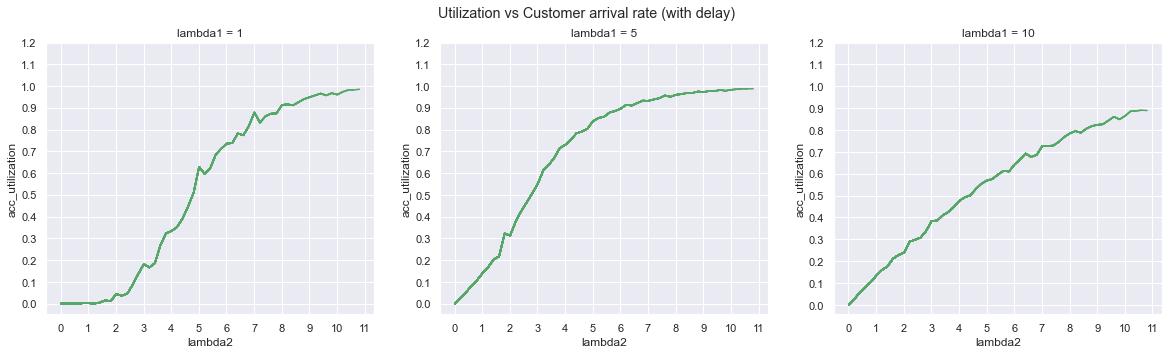

In [29]:
##### plot graph side by side in this cell

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

fig, axs = plt.subplots(1,3, figsize=(20,5)) # 1x3 so you have a row of plots

for i, aban in enumerate([1,5,10]):
    acc_total_T = [] #accumulated list of total taxi of each simulation run.
    acc_total_C = []

    acc_num_of_busy_taxi = []

    acc_Trip_complete = []

    acc_abandonment = []
    acc_utilization = []

    acc_lambda = []
    acc_throughput = []
    acc_NumC_aban = []

    for index in drange(0.01,11,0.2):
#         print("lambda2 = ",index)
        total_T, total_C, num_of_busy_taxi, Trip_complete, abandonment, utilization, \
        NumC_aban, list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, total_T_accum,\
        taxi_arrival_time, t_now_acc, utilization_acc, rate_aban_acc, utilization_each_taxi\
        = sim_taxi(lambda1 = aban, lambda2 = index, aban1= 1, aban2=1, time_coef=1, T=1000)

        acc_total_T.append(total_T)
        acc_total_C.append(total_C)
        acc_num_of_busy_taxi.append(num_of_busy_taxi)
        acc_Trip_complete.append(Trip_complete)
        acc_abandonment.append(abandonment)
        acc_utilization.append(utilization)
        acc_NumC_aban.append(NumC_aban) 
        acc_throughput.append(Customer_throughput)

        acc_lambda.append(index)

#         fig = ax.figure()
        axs[i].plot(acc_lambda, acc_utilization, 'g')
        axs[i].set_title("lambda1 = " + f'{aban}')


#         axs[i].xlabel('lambda2')
#         axs[i].ylabel('Utilization')
for ax in axs.flat:
    ax.set(xlabel='lambda2', ylabel='acc_utilization')
    ax.set_xticks(np.arange(0, 12, 1))

    ax.set_yticks(np.arange(0, 1.3, 0.1))

fig.suptitle('Utilization vs Customer arrival rate (with delay)')


plt.savefig('Uti_vs_lambda2_delayed.png')

plt.show()

  

# print("Printing accumulated elements")
# print("acc_total_T = ",acc_total_T)
# print("acc_total_C = ",acc_total_C)
# print("acc_utilization =",acc_utilization)




# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


In [ ]:
plt.plot(range(0,1954), list_utili)
plt.show()

lambda1 =  0.01
Total taxi = 4
Total customer = 1028
Total number of trip completion = 0
Customer left without service =  1028
rate of abandonment =  1.028
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 1.0417179272881407
END SIMULATION.
---------------------------------------------------------
lambda1 =  0.51
Total taxi = 525
Total customer = 1064
Total number of trip completion = 1
Customer left without service =  1061
rate of abandonment =  1.061
total_utilization 1.9796074391568936
utilization= 0.003742816659238982
Customer_throughput =  0.0018962716060627657
Average_customer_in_system = = 1.043947202936376
END SIMULATION.
---------------------------------------------------------
lambda1 =  1.01
Total taxi = 991
Total customer = 983
Total number of trip completion = 1
Customer left without service =  982
rate of abandonment =  0.982
total_utilization 1.6149443211828611
utilization= 0.0016853064203123424
Customer_throughput =  0.0016

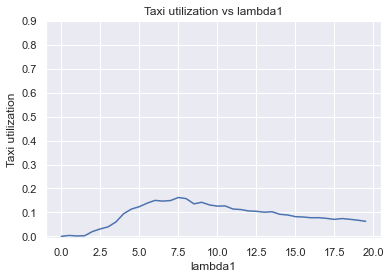

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.set()


acc_total_T = [] #accumulated list of total taxi of each simulation run.
acc_total_C = []

acc_num_of_busy_taxi = []

acc_Trip_complete = []

acc_abandonment = []
acc_utilization = []

acc_lambda = []
# acc_throughput = []
acc_NumC_aban = []

acc_Prop_aban = []



for index in drange(0.01,20,0.5):
    print("lambda1 = ",index)
    total_T, total_C, num_of_busy_taxi, Trip_complete, abandonment, utilization, \
    NumC_aban, list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, total_T_accum,\
    taxi_arrival_time, t_now_acc, utilization_acc, rate_aban_acc, utilization_each_taxi\
    = sim_taxi(lambda1 = index, lambda2 = 1, aban1= 1, aban2= 1, time_coef=1, T=1000)

    acc_total_T.append(total_T)
    acc_total_C.append(total_C)
    acc_num_of_busy_taxi.append(num_of_busy_taxi)
    acc_Trip_complete.append(Trip_complete)
    acc_abandonment.append(abandonment)
    acc_utilization.append(utilization)
    acc_NumC_aban.append(NumC_aban)
    acc_Prop_aban.append(Proportion_abandonment)
    
    
    acc_lambda.append(index)

#plot over here
plt.plot(acc_lambda, acc_utilization)
plt.title('Taxi utilization vs lambda1')
plt.xlabel('lambda1')
plt.ylabel('Taxi utilization')

plt.yticks(np.arange(0, 1, 0.1))
# plt.xticks(np.arange(0, 21, 1))

# plt.savefig('lambda1_vs_utilization.png')

plt.show()



lambda2 =  0.01
Total taxi = 979
Total customer = 9
Total number of trip completion = 0
Customer left without service =  9
rate of abandonment =  0.009
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.01036841896551941
END SIMULATION.
---------------------------------------------------------
lambda2 =  0.21000000000000002
Total taxi = 992
Total customer = 205
Total number of trip completion = 0
Customer left without service =  205
rate of abandonment =  0.205
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.2025959961802085
END SIMULATION.
---------------------------------------------------------
lambda2 =  0.41000000000000003
Total taxi = 1007
Total customer = 407
Total number of trip completion = 0
Customer left without service =  407
rate of abandonment =  0.407
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.39224604564611243
END SIM

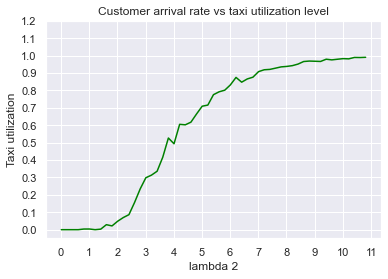

In [27]:
acc_total_T = [] #accumulated list of total taxi of each simulation run.
acc_total_C = []

acc_num_of_busy_taxi = []

acc_Trip_complete = []

acc_abandonment = []
acc_utilization = []

acc_lambda = []
# acc_throughput = []
acc_NumC_aban = []


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



for index in drange(0.01,11,0.2):
    print("lambda2 = ",index)
    total_T, total_C, num_of_busy_taxi, Trip_complete, abandonment, utilization, \
    NumC_aban, list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, total_T_accum,\
    taxi_arrival_time, t_now_acc, utilization_acc, rate_aban_acc, utilization_each_taxi\
    = sim_taxi(lambda1 = 1, lambda2 = index, aban1= 2, aban2=1, time_coef=1, T=1000)

    acc_total_T.append(total_T)
    acc_total_C.append(total_C)
    acc_num_of_busy_taxi.append(num_of_busy_taxi)
    acc_Trip_complete.append(Trip_complete)
    acc_abandonment.append(abandonment)
    acc_utilization.append(utilization)
    acc_NumC_aban.append(NumC_aban) 
    acc_lambda.append(index)


plt.plot(acc_lambda, acc_utilization, color = 'green')
plt.title('Customer arrival rate vs taxi utilization level')
plt.xlabel('lambda 2')
plt.ylabel('Taxi utilization')
plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 12, 1))



plt.savefig('utilization_vs_lambda2_delayed.png')
plt.show()


total_utilization  = 0.0
Total taxi = 100
Total customer = 85
Total number of trip completion = 0
Customer left without service =  85
rate of abandonment =  0.85
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.8403723426326734
END SIMULATION.
---------------------------------------------------------
total_utilization  = 0.0
Total taxi = 101
Total customer = 120
Total number of trip completion = 0
Customer left without service =  117
rate of abandonment =  1.17
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 0.9923699896481887
END SIMULATION.
---------------------------------------------------------
total_utilization  = 0.0
Total taxi = 101
Total customer = 133
Total number of trip completion = 0
Customer left without service =  131
rate of abandonment =  1.31
total_utilization 0.0
utilization= 0.0
Customer_throughput =  0.0
Average_customer_in_system = = 1.2761490510351632
END SIMULATION

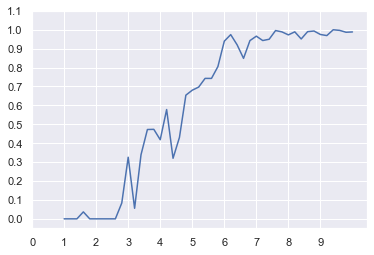

In [17]:
acc_total_T = [] #accumulated list of total taxi of each simulation run.
acc_total_C = []

acc_num_of_busy_taxi = []

acc_Trip_complete = []

acc_abandonment = []
acc_utilization = []

acc_lambda = []
# acc_throughput = []
acc_NumC_aban = []


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



for index in drange(1,10,0.2):
#     print("lambda2 = ",index)
    total_T, total_C, num_of_busy_taxi, Trip_complete, abandonment, utilization,\
    NumC_aban, list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment\
    = sim_taxi(lambda1 = 1, lambda2 = index, aban1= 1, aban2=1, time_coef=1, T=100)

    acc_total_T.append(total_T)
    acc_total_C.append(total_C)
    acc_num_of_busy_taxi.append(num_of_busy_taxi)
    acc_Trip_complete.append(Trip_complete)
    acc_abandonment.append(abandonment)
    acc_utilization.append(utilization)
    acc_NumC_aban.append(NumC_aban) 
    acc_lambda.append(index)


plt.plot(acc_lambda, acc_utilization)
plt.yticks(np.arange(0, 1.2, 0.1))
plt.xticks(np.arange(0, 10, 1))
plt.show()